**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

<div class="alert alert-block alert-info">
"He uses statistics as a drunken man uses lamp posts—for support rather than for illumination." --- Marissa Mayer
</div>

# ANOVA

Whole big books have been written about Analysis of Variance (ANOVA). Although there are many ANOVA experimental designs available, biologists are taught to pay special attention to the design of experiments, and generally make sure that the experiments are fully factorial (in the case of two-way or higher ANOVAs) and balanced. For this reason we will focus in this Introductory Statistics course on one-way and factorial ANOVAs only.

As *t*-tests, ANOVAs require that some assumptions are met:

-   Normally distributed data
-   Homogeneity of variances
-   Independence of data
-   In our case, we will encourage also that the data are balanced

If some of the above assumptions are violated, then your course of action is either to transform the data (if non-normal) or to use a generalised linear model (also when non-normal), or to use a linear mixed model (when the assumption on non-independence cannot be guaranteed). We will get to some of these methods in later chapters. Linked to the above, ANOVAs are also sensitive to the presence of outliers (see our earlier discussion about the mean and how it differs from the median), so we need to ensure that outliers are not present (they can be removed, and there are many ways of finding them and eliminating them). If outliers are an important feature of the data, then a non-parametric test can be used, or some other test that works well with extreme values can be applied.

Rather than talking about *t*-tests and ANOVAs as separate things, let us acknowledge that they are similar ways of asking the same question. That question being, are the means of these two or more things we want to compare different, or the same? At this stage it is important to note that the independent variable is categorical (i.e. a factor denoting two or more different treatments or sampling conditions) and that the dependent variable is continuous. You may perhaps be more familiar with this question when it is presented as a set of hypotheses.

> H0: Group A is not different from group B.
>
> H1: Group A is different from group B.

This is a scientific question in the simplest sense. Often, for basic inquiries such as that posed above, we need to see if one group differs significantly from another. The way in which we accomplish this is by looking at the mean and variance within a set of data compared against another similar set. In order to do so appropriately however we need to first assume that both sets of data are normally distributed, and that the variance found within each set of data is similar. These are the two primary assumptions we learned about in Chapter 6, and if they are met then we may use parametric tests. We will learn in Chapter 9 what we can do if these assumptions are not meant and we cannot adequately transform our data, meaning we will need to use non-parametric tests.

## Remember the *t*-test

As you know, a *t*-test is used when we want to compare two different sample sets against one another. This is also known as a two-factor or two level test. When one wants to compare multiple (more than two) sample sets against one another an ANOVA is required (see below). Remember how to perform a *t*-test in R: we will revisit this test using the `chicks` data, but only for Diets 1 and 2 from day 21.

In [1]:
# Load all required packages
options(warn = -1) # switch of warning messages globally
options(tidyverse.quiet = TRUE)
library(tidyverse)
library(tidyverse)
library(ggpubr)

# First grab the data
chicks <- as_tibble(ChickWeight)

# Then subset out only the sample sets to be compared
chicks_sub <- chicks %>% 
  filter(Diet %in% c(1, 2), Time == 21)

Once we have filtered our data we may now perform the *t*-test. Traditionally this would be performed with `t.test()`, but recent developments in R have made any testing for the comparison of means more convenient by wrapping everything up into the one single function `compare_means()`. We may use only this one single function for many of the tests we will perform in this chapter as well as Chapter 9. To use `compare_means()` for a *t*-test we must simply specify this in the `method` argument, as seen below:

In [2]:
compare_means(weight ~ Diet, data = chicks_sub, method = "t.test")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
weight,1,2,0.2176326,0.22,0.22,ns,T-test


As one may recall from the previous chapter, whenever we want to give a formula to a function in R, we use the `~`. The formula used above, `weight ~ Diet`, reads in plain English as "weight as a function of diet". This is perhaps easier to understand as "Y as a function of X". This means that we are assuming whatever is to the left of the `~` is the dependant variable, and whatever is to the right is the independent variable. We then tell `compare_means()` to run a *t*-test on our `chicks_sub` dataframe and it does the rest. We see in the output above that this function gives us a rather tidy read-out of the information we require to test a potential hypothesis. Let's take a moment to look through the help file for this function and see what all of this means. Did the Diet 1 and 2 produce significantly fatter birds?

## ANOVA

In the `chicks` data we have four diets, not only two as in the *t*-test example just performed. Why not then simply do a *t*-test multiple times, once for each pair of diets given to the chickens? The problem is that the chances of committing a Type I error increases as more multiple comparisons are done. So, the overall chance of rejecting the null hypothesis increases. Why? If one sets $\alpha=0.05$ (the significance level below which the null hypothesis is no longer accepted), one will still reject the null hypothesis 5% of the time when it is in fact true (i.e. when there is no difference between the groups). When many pairwise comparisons are made, the probability of rejecting the null hypothesis at least once is higher because we take this 5% risk each time we repeat a *t*-test. In the case of the chicken diets, we would have to perform six *t*-tests, and the error rate would increase to slightly less than $6\times5\%$. If you insist in creating more work for yourself and do *t*-tests many times, one way to overcome the problem of committing Type I errors that stems from multiple comparisons is to apply a Bonferroni correction.

Or better still, we do an ANOVA that controls for these Type I errors so that it remains at 5%.

A suitable null hypothesis for our chicken weight data is:

$$H_{0}:\mu_{1}=\mu_{2}=\mu_{3}=\mu_{4}$$ where $\mu_{1...4}$ are the means of the four diets.

At this point I was very tempted to put many equations here, but I ommitted them for your sake. Let us turn to some examples.

### Single factor

We continue with the chicken data. The *t*-test showed that Diets 1 and 2 resulted in the same chicken masses at the end of the experiment at Day 21. What about the other two diets? Our null hypothesis is that, at Day 21, $\mu_{1}=\mu_{2}=\mu_{3}=\mu_{4}$. Is there a statistical difference between chickens fed these four diets, or do we retain the null hypothesis? The R function for an ANOVA is `aov()`. To look for significant differences between all four diets on the last day of sampling we use this one line of code:

In [3]:
chicks.aov1 <- aov(weight ~ Diet, data = filter(chicks, Time == 21))
summary(chicks.aov1)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         3  57164   19055   4.655 0.00686 **
Residuals   41 167839    4094                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<div class="alert alert-block alert-success">
<b>Task:</b> What does the outcome say about the chicken masses? Which ones are different from each other?
</div>

<div class="alert alert-block alert-success">   
<b>Task:</b> Devise a graphical display of this outcome.
</div>
    
If this seems too easy to be true, it's because we aren't quite done yet. You could use your graphical display to eyeball where the significant differences are, or we can turn to a more 'precise' approach. The next step one could take is to run a Tukey HSD test on the results of the ANOVA by wrapping `tukeyHSD()` around `aov()`:

In [4]:
TukeyHSD(chicks.aov1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ Diet, data = filter(chicks, Time == 21))

$Diet
         diff        lwr       upr     p adj
2-1  36.95000  -32.11064 106.01064 0.4868095
3-1  92.55000   23.48936 161.61064 0.0046959
4-1  60.80556  -10.57710 132.18821 0.1192661
3-2  55.60000  -21.01591 132.21591 0.2263918
4-2  23.85556  -54.85981 102.57092 0.8486781
4-3 -31.74444 -110.45981  46.97092 0.7036249


In [5]:
show_video <- function(filename, mimetype) {
    library(IRdisplay)
    library(base64enc)

    data = base64encode(filename, 'raw')

    display_html(paste0('<video controls src="data:',
         mimetype, ';base64,', data, '">'))
    }

The output of `tukeyHSD()` shows us that pairwise comparisons of all of the groups we are comparing.

<div class="alert alert-block alert-success">
<b>Task:</b> Look at the help file for this function to better understand what the output means.
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> How does one interpret the results? What does this tell us about the effect that that different diets has on the chicken weights at Day 21?
</div>
    
<div class="alert alert-block alert-success">   
<b>Task:</b> Figure out a way to plot the Tukey HSD outcomes.
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> Why does the ANOVA return a significant result, but the Tukey test shows that not all of the groups are significantly different from one another?
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> Produce a graphical display of the Tukey HSD result.
</div>

<!-- ```{r} -->

<!-- # plot(TukeyHSD(chicks.aov)) -->

<!-- ``` -->

Now that we've seen how to perform a single factor ANOVA, let's watch some animations that highlight how certain aspects of our data may affect our results.

-   When the [sample size](../Resources/aov_n_slide.mp4){width="400" height="300"} <video width="320" height="240" controls> <source src="../Resources/aov_n_slide.mp4" type="video/mp4"> </video> changes
-   When the [mean](figures/aov_mean_slide.mp4){width="400" height="300"} <video width="320" height="240" controls> <source src="figures/aov_mean_slide.mp4" type="video/mp4"> </video> of one sample changes
-   When the [variance](../Resources/aov_sd_slide.mp4){width="400" height="300"} <video width="320" height="240" controls> <source src="figures/aov_sd_slide.mp4" type="video/mp4"> </video> of one sample increases

### Multiple factors

What if we have multiple grouping variables, and not just one? In the case of the chicken data, there is also time that seems to be having an effect.

<div class="alert alert-block alert-success">
<b>Task:</b> How is time having an effect?
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> What hypotheses can we construct around time?
</div>
    
Let us look at some variations around questions concerning time. We might ask, at a particular time step, are there differences amongst the effect due to diet on chicken mass? Let's see when diets are starting the have an effect by examining the outcomes at times 0, 2, 10, and 21:

In [6]:
summary(aov(weight ~ Diet, data = filter(chicks, Time %in% c(0))))
summary(aov(weight ~ Diet, data = filter(chicks, Time %in% c(2))))
summary(aov(weight ~ Diet, data = filter(chicks, Time %in% c(10))))
summary(aov(weight ~ Diet, data = filter(chicks, Time %in% c(21))))

            Df Sum Sq Mean Sq F value Pr(>F)
Diet         3   4.32   1.440   1.132  0.346
Residuals   46  58.50   1.272               

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         3  158.4   52.81   4.781 0.00555 **
Residuals   46  508.1   11.05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
Diet         3   8314    2771    6.46 0.000989 ***
Residuals   45  19304     429                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         3  57164   19055   4.655 0.00686 **
Residuals   41 167839    4094                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<div class="alert alert-block alert-success">
<b>Task:</b> What do you conclude from the above series of ANOVAs?
</div>
    
<div class="alert alert-block alert-success">
<b>Task:</b> What problem is associated with running multiple tests in the way that we have done here?
</div>

Or we may ask, regardless of diet (i.e. disregarding the effect of diet by clumping all chickens together), is time having an effect?

In [7]:
chicks.aov2 <- aov(weight ~ as.factor(Time), data = filter(chicks, Time %in% c(0, 2, 10, 21)))
summary(chicks.aov2)

                 Df Sum Sq Mean Sq F value Pr(>F)    
as.factor(Time)   3 939259  313086   234.8 <2e-16 ***
Residuals       190 253352    1333                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<div class="alert alert-block alert-success">
<b>Task:</b> What do you conclude from the above ANOVA?
</div>

Or, to save ourselves a lot of time and reduce the coding effort, we may simply run a two-way ANOVA and look at the effects of `Diet` and `Time` simultaneously. To specify the different factors we put them in our formula and separate them with a `+`:

In [8]:
summary(aov(weight ~ Diet + as.factor(Time), data = filter(chicks, Time %in% c(0, 21))))

                Df Sum Sq Mean Sq F value  Pr(>F)    
Diet             3  39595   13198   5.987 0.00091 ***
as.factor(Time)  1 734353  734353 333.120 < 2e-16 ***
Residuals       90 198402    2204                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<div class="alert alert-block alert-success">
<b>Task:</b> What question are we asking with the above line of code? What is the answer? Also, why did we wrap `Time` in `as.factor()`?
</div>

It is also possible to look at what the interaction effect between grouping variables (i.e. in this case the effect of time on diet---does the effect of time depend on which diet we are looking at?), and not just within the individual grouping variables. To do this we replace the `+` in our formula with `*`:

In [9]:
summary(aov(weight ~ Diet * as.factor(Time), data = filter(chicks, Time %in% c(4, 21))))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
Diet                  3  40914   13638   6.968 0.000298 ***
as.factor(Time)       1 582221  582221 297.472  < 2e-16 ***
Diet:as.factor(Time)  3  25530    8510   4.348 0.006684 ** 
Residuals            86 168322    1957                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<div class="alert alert-block alert-success">
<b>Task:</b> How do these results differ from the previous set?
</div>

One may also run a post-hoc Tukey test on these results the same as for a single factor ANOVA:

In [10]:
TukeyHSD(aov(weight ~ Diet * as.factor(Time), data = filter(chicks, Time %in% c(20, 21))))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ Diet * as.factor(Time), data = filter(chicks, Time %in% c(20, 21)))

$Diet
         diff        lwr       upr     p adj
2-1  36.18030  -9.301330  81.66194 0.1663037
3-1  90.63030  45.148670 136.11194 0.0000075
4-1  62.25253  15.223937 109.28111 0.0045092
3-2  54.45000   3.696023 105.20398 0.0305957
4-2  26.07222 -26.072532  78.21698 0.5586643
4-3 -28.37778 -80.522532  23.76698 0.4863940

$`as.factor(Time)`
          diff       lwr      upr     p adj
21-20 8.088223 -17.44017 33.61661 0.5303164

$`Diet:as.factor(Time)`
                diff        lwr        upr     p adj
2:20-1:20  35.188235  -40.67378 111.050253 0.8347209
3:20-1:20  88.488235   12.62622 164.350253 0.0111136
4:20-1:20  63.477124  -14.99365 141.947897 0.2035951
1:21-1:20   7.338235  -58.96573  73.642198 0.9999703
2:21-1:20  44.288235  -31.57378 120.150253 0.6116081
3:21-1:20  99.888235   24.02622 175.750253 0.0023872
4:

<div class="alert alert-block alert-success">
<b>Task:</b> Yikes! That's a massive amount of results. What does all of this mean, and why is it so verbose?
</div>

#### About interaction terms

<!-- AJS to insert stuff here -->

### Examples

#### Snakes!

These data could be analysed by a two-way ANOVA without replication, or a repeated measures ANOVA. Here I will analyse it by using a two-way ANOVA without replication.

Place and Abramson (2008) placed diamondback rattlesnakes (*Crotalus atrox*) in a "rattlebox," a box with a lid that would slide open and shut every 5 minutes. At first, the snake would rattle its tail each time the box opened. After a while, the snake would become habituated to the box opening and stop rattling its tail. They counted the number of box openings until a snake stopped rattling; fewer box openings means the snake was more quickly habituated. They repeated this experiment on each snake on four successive days, which is treated as an influential variable here. Place and Abramson (2008) used 10 snakes, but some of them never became habituated; to simplify this example, data from the six snakes that did become habituated on each day are used.

First, we read in the data, making sure to convert the column named `day` to a factor. Why? Because ANOVAs work with factor independent variables, while `day` as it is encoded by default is in fact a continuous variable.

In [11]:
snakes <- read.csv("../data/snakes.csv")
snakes$day = as.factor(snakes$day)

The first thing we do is to create some summaries of the data. Refer to the summary statistics Chapter.

In [12]:
snakes.summary <- snakes %>% 
  group_by(day, snake) %>% 
  summarise(mean_openings = mean(openings),
            sd_openings = sd(openings), .groups = "drop") %>% 
  ungroup()
snakes.summary

day,snake,mean_openings,sd_openings
<fct>,<chr>,<dbl>,<dbl>
1,D1,85,NA
1,D11,40,NA
1,D12,65,NA
1,D3,107,NA
1,D5,61,NA
1,D8,22,NA
2,D1,58,NA
2,D11,45,NA
2,D12,27,NA


<div class="alert alert-block alert-success">
<b>Task:</b> Something seems... off. What's going on here? Please explain this outcome.
</div>

To fix this problem, let us ignore the grouping by both `snake` and `day`.

In [13]:
snakes.summary <- snakes %>% 
  group_by(day) %>% 
  summarise(mean_openings = mean(openings),
            sd_openings = sd(openings)) %>% 
  ungroup()
snakes.summary

suppressMessages(library(Rmisc))
snakes.summary2 <- summarySE(data = snakes, measurevar = "openings", groupvars = c("day"))

day,mean_openings,sd_openings
<fct>,<dbl>,<dbl>
1,63.33333,30.45434
2,47.00000,12.21475
3,34.50000,25.95958
4,25.33333,18.08498


Now we turn to some visual data summaries:

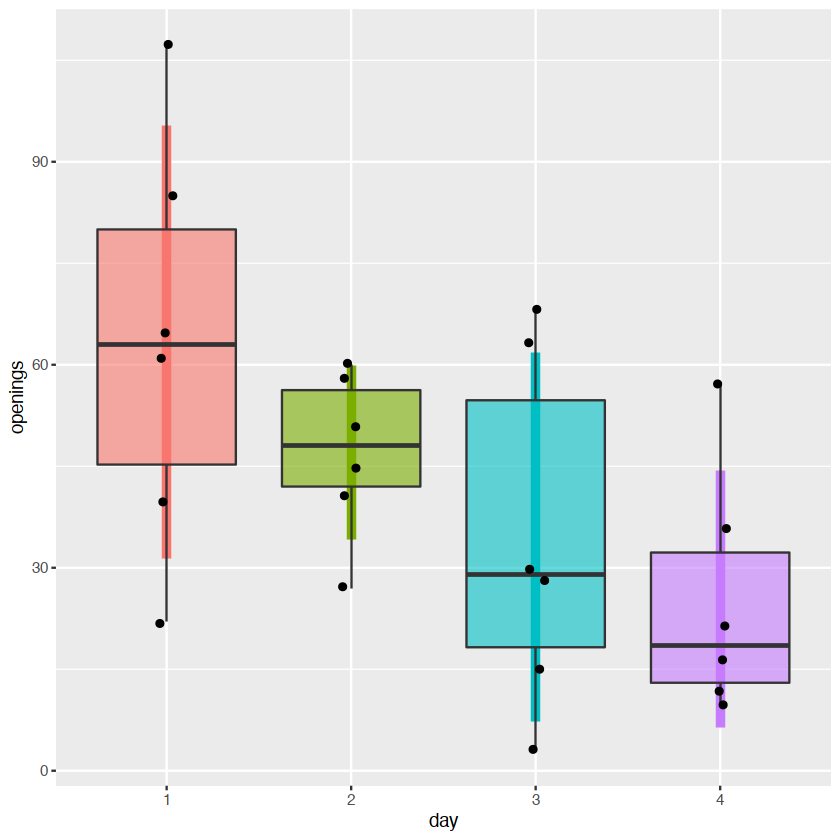

In [14]:
ggplot(data = snakes, aes(x = day, y = openings)) +
  geom_segment(data = snakes.summary2, aes(x = day, xend = day, y = openings - ci, yend = openings + ci, colour = day),
              size = 2.0, linetype = "solid", show.legend = F) +
  geom_boxplot(aes(fill = day), alpha = 0.6, show.legend = F) + 
  geom_jitter(width = 0.05)

What are our null hypotheses?

1.  H0: There is no difference between snakes with respect to the number of openings at which they habituate.
2.  H0: There is no difference between days in terms of the number of openings at which the snakes habituate.

Fit the ANOVA model to test these hypotheses:


In [15]:
snakes.aov <- aov(openings ~ day + snake, data = snakes)
summary(snakes.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
day          3   4878  1625.9   3.320 0.0487 *
snake        5   3042   608.4   1.242 0.3382  
Residuals   15   7346   489.7                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Now we need to test of the assumptions hold true (i.e. erros are normally distributed and heteroscedastic). Also, where are the differences?

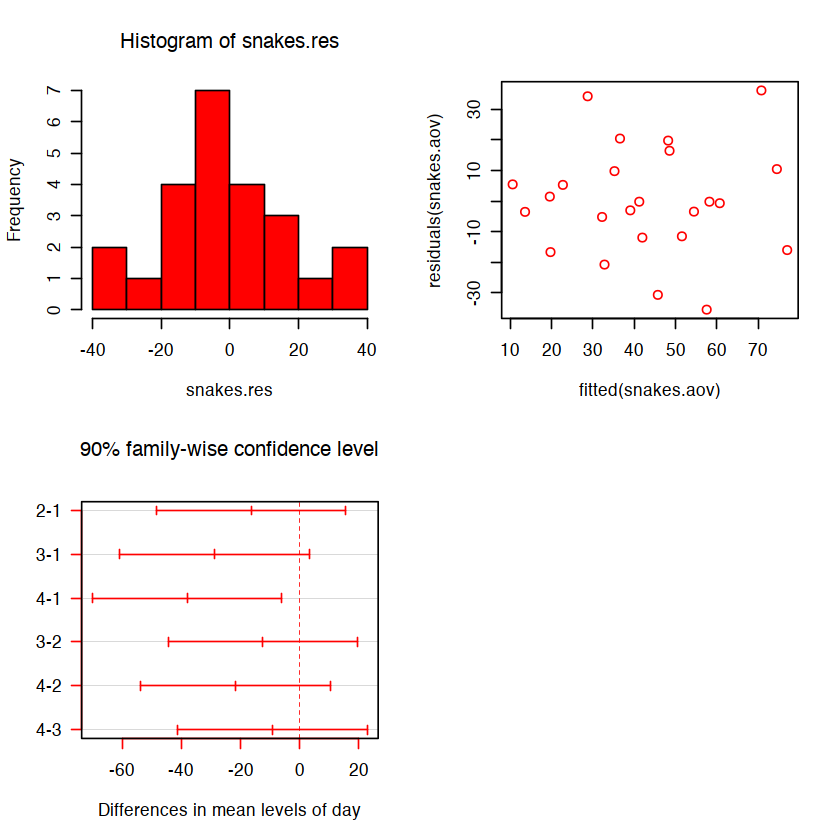

In [16]:
par(mfrow = c(2, 2))
# Checking assumptions...
# make a histogram of the residuals;
# they must be normal
snakes.res <- residuals(snakes.aov)
hist(snakes.res, col = "red")

# make a plot of residuals and the fitted values;
# # they must be normal and homoscedastic
plot(fitted(snakes.aov), residuals(snakes.aov), col = "red")

snakes.tukey <- TukeyHSD(snakes.aov, which = "day", conf.level = 0.90)
plot(snakes.tukey, las = 1, col = "red")

## Alternatives to ANOVA

In the first main section of this chapter we learned how to test hypotheses based on the comparisons of means between sets of data when we were able to meet our two base assumptions. These parametric tests are preferred over non-parametric tests because they are more robust. However, when we simply aren't able to meet these assumptions we must not despair. Non-parametric tests are still useful. In this chapter we will learn how to run non-parametric tests for two sample and multiple sample datasets. Let us go back to the `chicks` data:

In [17]:
# Then check for failing assumptions
chicks %>% 
  filter(Time == 0) %>% 
  group_by(Diet) %>% 
  summarise(norm_wt = as.numeric(shapiro.test(weight)[2]),
            var_wt = var(weight))

norm_wt,var_wt
<dbl>,<dbl>
0.000221918,1.282041


### Wilcox rank sum test

The non-parametric version of a t-test is a Wilcox rank sum test. To perform this test in R we may again use `compare_means()` and specify the test we want:

In [18]:
compare_means(weight ~ Diet, data = filter(chicks, Time == 0, Diet %in% c(1, 2)), method = "wilcox.test")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
weight,1,2,0.2348283,0.23,0.23,ns,Wilcoxon


What do our results show?

### Kruskall-Wallis rank sum test

#### Single factor

The non-parametric version of an ANOVA is a Kruskall-Wallis rank sum test. As you may have by now surmised, this may be done with `compare_means()` as seen below:

In [19]:
compare_means(weight ~ Diet, data = filter(chicks, Time == 0), method = "kruskal.test")

.y.,p,p.adj,p.format,p.signif,method
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
weight,0.4754503,0.48,0.48,ns,Kruskal-Wallis


As with the ANOVA, this first step with the Kruskall-Wallis test is not the last. We must again run a post-hoc test on our results. This time we will need to use `pgirmess::kruskalmc()`, which means we will need to load a new library.

In [24]:
suppressMessages(library(pgirmess))

kruskalmc(weight ~ Diet, data = filter(chicks, Time == 0))

,obs.dif,critical.dif,difference
,<dbl>,<dbl>,<lgl>
1-2,6.95,14.89506,FALSE
1-3,6.90,14.89506,FALSE
1-4,4.15,14.89506,FALSE
2-3,0.05,17.19933,FALSE
2-4,2.80,17.19933,FALSE
3-4,2.75,17.19933,FALSE


Let's consult the help file for `kruskalmc()` to understand what this print-out means.

#### Multiple factors

The water becomes murky quickly when one wants to perform multiple factor non-parametric comparison of means tests. To that end, we will not cover the few existing methods here. Rather, one should avoid the necessity for these types of tests when designing an experiment.

### The SA time data

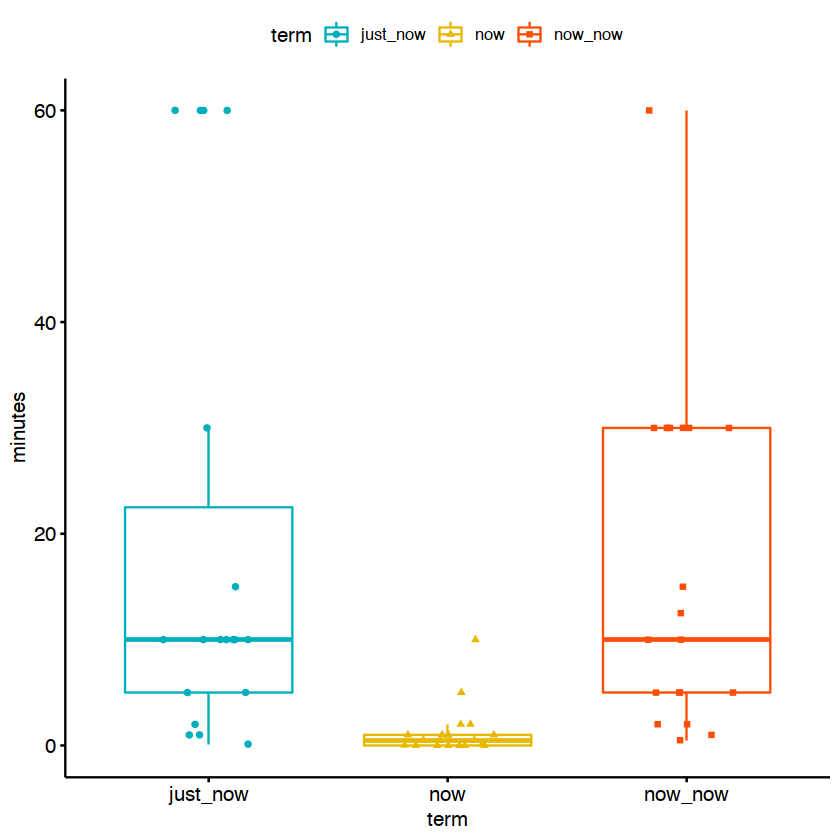

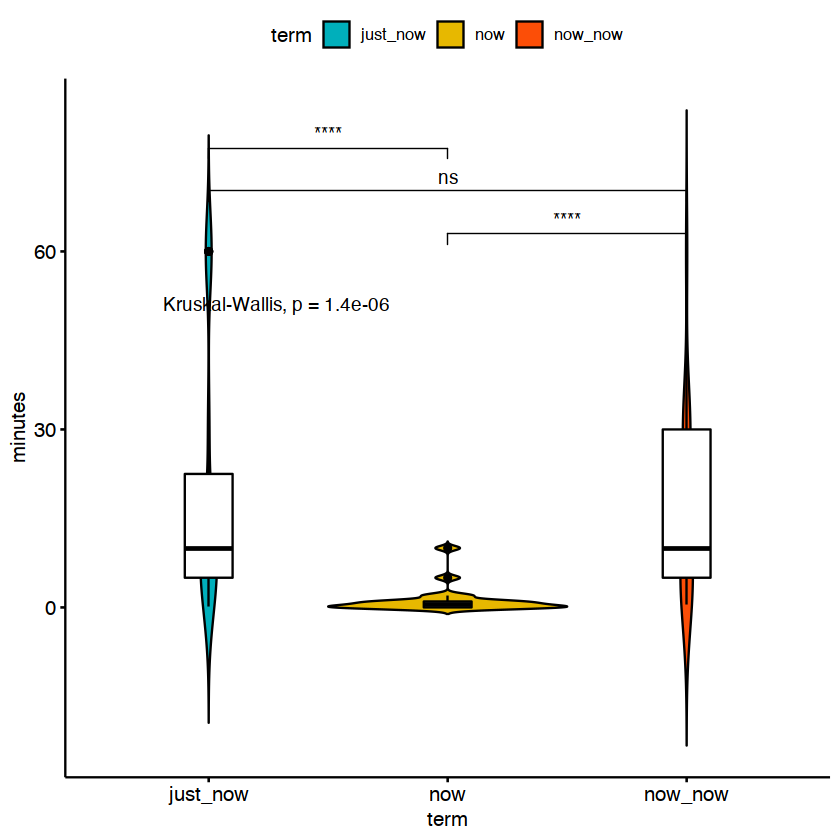

In [21]:
sa_time <- as_tibble(read_csv("../data/SA_time.csv", col_types = list(col_double(), col_double(), col_double())))
sa_time_long <- sa_time %>% 
  gather(key = "term", value = "minutes") %>% 
  filter(minutes < 300) %>% 
  mutate(term = as.factor(term))

my_comparisons <- list( c("now", "now_now"), c("now_now", "just_now"), c("now", "just_now") )

ggboxplot(sa_time_long, x = "term", y = "minutes",
          color = "term", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          add = "jitter", shape = "term")

ggviolin(sa_time_long, x = "term", y = "minutes", fill = "term",
         palette = c("#00AFBB", "#E7B800", "#FC4E07"),
         add = "boxplot", add.params = list(fill = "white")) +
  stat_compare_means(comparisons = my_comparisons, label = "p.signif") + # Add significance levels
  stat_compare_means(label.y = 50)                                      # Add global the p-value 

## Exercises

<div class="alert alert-block alert-success">
    <b>Exercise 1:</b> Here is bunch of data for pigs raised on different diets. The experiment is similar to the chicken one. Does feed type have an effect on the mass of pigs at the end of the experiment?
</div>

In [22]:
# enter the mass at the end of the experiment
feed_1 <- c(60.8, 57.0, 65.0, 58.6, 61.7)
feed_2 <- c(68.7, 67.7, 74.0, 66.3, 69.8)
feed_3 <- c(102.6, 102.1, 100.2, 96.5)
feed_4 <- c(87.9, 84.2, 83.1, 85.7, 90.3)

# make a dataframe
bacon <- as_tibble(data.frame(
  feed = c(
  rep("Feed 1", length(feed_1)),
  rep("Feed 2", length(feed_2)),
  rep("Feed 3", length(feed_3)),
  rep("Feed 4", length(feed_4))
  ),
  mass = c(feed_1, feed_2, feed_3, feed_4)
  ))

<div class="alert alert-block alert-success">
<b>Exercise 2:</b> Construct suitable null and alternative hypotheses for the built-in `ToothGrowth` data, and test your hypotheses using an ANOVA.
</div>

In [23]:
teeth <- datasets::ToothGrowth

<div class="alert alert-block alert-success">
<b>Exercise 3:</b> Find or generate your own data that lend themselves to being analysed by a two-way ANOVA. Generate suitable hypotheses about your data, and analyse it. Supplement your analysis by providing a suitable descriptive statistical summary and graph(s) of your data.
</div>